# Code Example of a Neural Network for The Function XOR

Based on the implementation by [Chih-Ling Hsu](https://chih-ling-hsu.github.io/2017/08/30/NN-XOR).

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time

from net import NeuralNetwork
from net import Plots
from perceptron import Perceptron

## Neural Network Training

First we define network architecture, activation function, input data with labels. The training is called by the method `fit()`.

In [2]:
net_arch = [2, 2, 2, 2, 2, 2, 2, 2, 1]

# Initialize the NeuralNetwork
net = NeuralNetwork(net_arch,
                    act= 'tanh')

# Set the input data
X = np.array([[-1, -1], [-1, 1],
               [1, -1], [1, 1]])


# Set the labels, the correct results for the xor operation
y = np.array([-1, 1, 
              1, -1])

# Call the fit function and train the network for a chosen number of epochs
net.fit(X, 
        y,
        epochs= 1000000,
        int_rep= True,
        int_rep_index= -2,
        save_weights= True,
        learning_rate= 0.1)

# Show the prediction results
print("Final prediction")
for s in X:
    print(s, net.predict_single_data(s))

epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
epochs: 100000
epochs: 110000
epochs: 120000
epochs: 130000
epochs: 140000
epochs: 150000
epochs: 160000
epochs: 170000
epochs: 180000
epochs: 190000
epochs: 200000
epochs: 210000
epochs: 220000
epochs: 230000
epochs: 240000
epochs: 250000
epochs: 260000
epochs: 270000
epochs: 280000
epochs: 290000
epochs: 300000
epochs: 310000
epochs: 320000
epochs: 330000
epochs: 340000
epochs: 350000
epochs: 360000
epochs: 370000
epochs: 380000
epochs: 390000
epochs: 400000
epochs: 410000
epochs: 420000
epochs: 430000
epochs: 440000
epochs: 450000
epochs: 460000
epochs: 470000
epochs: 480000
epochs: 490000
epochs: 500000
epochs: 510000
epochs: 520000
epochs: 530000
epochs: 540000
epochs: 550000
epochs: 560000
epochs: 570000
epochs: 580000
epochs: 590000
epochs: 600000
epochs: 610000
epochs: 620000
epochs: 630000
epochs: 640000
epochs: 650000
epochs: 660000
epochs: 670000
epoc

Decision boundaries:

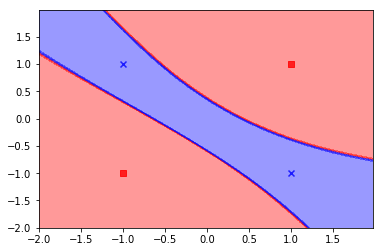

In [3]:
plots = Plots(X, y, net)
plots.decision_regions()

The internal representations and weights during training can be extract to further analysis.

In [4]:
int_rep = net.int_rep_dyn()
weights = net.weights_dyn()

### Linear separability over layers: perceptron

Note that the perceptron works with $\{ 0, 1\}$ inputs instead of $\{ -1, + 1 \}$.

In [ ]:
layer = []
epoch = []
linear_sep_ = []

y_p = ((y + 1)/2).astype(int)

for j in range(1, len(int_rep)):
       
    t0 = time.time()
    
    print('Epoch %d' % j)

    for k in range(len(int_rep[1]) - 1 ):
        
        #t0_l = time.time()
        
        int_p = (int_rep[j][k] + 1.)/2.
        
        linear_sep = Perceptron(int_rep[j][k], y_p).train()
        
        linear_sep_.append(linear_sep)
        
        layer.append(k)
        epoch.append(j)
        
        #t1_l = time.time()
        #deltaT = t1_l - t0_l
        #print('layer %d time %.2f s' % (k, deltaT ) )
        
    t1 = time.time()
    deltaT = t1 - t0
    
    print('time elapsed epoch %.2f s' % deltaT)
    
    if (j % 100000):
        name = 'output/linear_sep_ep%d' % j
        with open(name, 'wb') as f:
            pickle.dump(linear_sep_, f)

Epoch 1
time elapsed epoch 26.27 s
Epoch 2
time elapsed epoch 23.60 s
Epoch 3


In [ ]:
#slicing = 100
slicing = len(epoch)

f = plt.figure(figsize=(15,4))

scatters = plt.scatter(epoch[0:slicing], layer[0:slicing], c= linear_sep_[0:slicing])
cbar = plt.colorbar(scatters)
cbar.ax.set_yticklabels(['0', '', '', '', '', '1'])
cbar.set_label('Linear Sep', fontsize= 15, rotation= 90)
plt.ylabel('Layer', fontsize= 15)
plt.xlabel('Epoch', fontsize= 15)
#plt.xscale('log')
plt.show()

In [ ]:
slicing = 100
#slicing = len(epoch)

f = plt.figure(figsize=(15,4))

scatters = plt.scatter(epoch[0:slicing], layer[0:slicing], c= linear_sep__[0:slicing])
cbar = plt.colorbar(scatters)
cbar.ax.set_yticklabels(['0', '', '', '', '', '1'])
cbar.set_label('Linear Sep', fontsize= 15, rotation= 90)
plt.ylabel('Layer', fontsize= 15)
plt.xlabel('Epoch', fontsize= 15)
plt.xscale('log')
plt.show()

In [ ]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 
                                       sharex=True,
                                       sharey=True,
                                       figsize=(10,15))
ax1.plot(l_minus_minus_x, marker='.', label= '$x_0$ = %d' % l_minus_minus_x[0])
ax1.plot(l_minus_minus_y, marker='.', label= '$y_0$ = %d' % l_minus_minus_y[0])
ax1.legend(fontsize= 12)
ax2.plot(l_minus_plus_x, marker='.', label= '$x_0$ = %d' % l_minus_plus_x[0])
ax2.plot(l_minus_plus_y, marker='.', label= '$y_0$ = %d' % l_minus_plus_y[0])
ax2.legend(fontsize= 12)
ax3.plot(l_plus_minus_x, marker='.', label= '$x_0$ = %d' % l_plus_minus_x[0])
ax3.plot(l_plus_minus_y, marker='.', label= '$y_0$ = %d' % l_plus_minus_y[0])
ax3.legend(fontsize= 12)
ax4.plot(l_plus_plus_x, marker='.', label= '$x_0$ = %d' % l_plus_plus_x[0])
ax4.plot(l_plus_plus_y, marker='.', label= '$y_0$ = %d' % l_plus_plus_y[0])
ax4.legend(fontsize= 12)
ax4.set_xlabel('Epochs', fontsize= 15)

# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
#plt.xlim(-10, 1000)
#plt.legend()
plt.show()

## Information processing

In [ ]:
nn_trained = NeuralNetwork(net_arch,
                           act= 'tanh',
                           W= weights[-1])

In [ ]:
x_dynamics = nn_trained.forward(X)

In [ ]:
x_dynamics[-1]

In [ ]:
l_minus_minus_x = []
l_minus_minus_y = []
l_minus_plus_x = []
l_minus_plus_y = []
l_plus_minus_x = []
l_plus_minus_y = []
l_plus_plus_x = []
l_plus_plus_y = []


for j in range(len(x_dynamics) - 1):
    
    l_minus_minus_x.append(x_dynamics[j][0][0])
    l_minus_minus_y.append(x_dynamics[j][0][1])
    l_minus_plus_x.append(x_dynamics[j][1][0])
    l_minus_plus_y.append(x_dynamics[j][1][1])
    l_plus_minus_x.append(x_dynamics[j][2][0])
    l_plus_minus_y.append(x_dynamics[j][2][1])
    l_plus_plus_x.append(x_dynamics[j][3][0])
    l_plus_plus_y.append(x_dynamics[j][3][1])

In [ ]:
plot_dynamics(l_minus_minus_x, l_minus_minus_y,
              l_minus_plus_x, l_minus_plus_y,
              l_plus_minus_x, l_plus_minus_y,
              l_plus_plus_x, l_plus_plus_y,
              training= False)

In [ ]:
for j in range(len(l_minus_minus_x)):
    
    ints = closed_segment_intersect([l_minus_minus_x[j], l_minus_minus_y[j]], 
                                    [l_plus_plus_x[j], l_plus_plus_y[j]],
                                    [l_minus_plus_x[j], l_minus_plus_y[j]], 
                                    [l_plus_minus_x[j], l_plus_minus_y[j]])
    
    sep = bool(abs(int(ints) - 1 ))
    
    print('Layer = %d' %j, 'Sep = %s' %sep)

In [ ]:
def plot_dynamics(l_minus_minus_x, l_minus_minus_y,
                  l_minus_plus_x, l_minus_plus_y,
                  l_plus_minus_x, l_plus_minus_y,
                  l_plus_plus_x, l_plus_plus_y, 
                  training= False):
    
    if training:
        title = 'Training dynamics'
    else:
        title = 'Layer dynamics'
    
    
    xq = np.array(l_minus_minus_x)
    yq = np.array(l_minus_minus_y)

    plt.quiver(xq[:-1], yq[:-1], xq[1:]-xq[:-1], yq[1:]-yq[:-1], 
               scale_units= 'xy', 
               angles= 'xy', 
               scale= 1,
               width= 0.005,
               color= 'b', 
               headwidth= 5)
    plt.plot(xq, yq, 'o', markersize= 0.5, color= 'b')

    ###############################

    xq = np.array(l_minus_plus_x)
    yq = np.array(l_minus_plus_y)

    plt.quiver(xq[:-1], yq[:-1], xq[1:]-xq[:-1], yq[1:]-yq[:-1], 
               scale_units= 'xy', 
               angles= 'xy', 
               scale= 1,
               width= 0.005,
               color= 'r',
               headwidth= 5)
    plt.plot(xq, yq, 'o', markersize= 0.5, color= 'r')

    ###############################

    xq = np.array(l_plus_minus_x)
    yq = np.array(l_plus_minus_y)

    plt.quiver(xq[:-1], yq[:-1], xq[1:]-xq[:-1], yq[1:]-yq[:-1], 
               scale_units= 'xy', 
               angles= 'xy', 
               scale= 1,
               width= 0.005,
               color= 'g',
               headwidth= 5)
    plt.plot(xq, yq, 'o', markersize= 0.5, color= 'g')

    ###############################

    xq = np.array(l_plus_plus_x)
    yq = np.array(l_plus_plus_y)
    
    plt.quiver(xq[:-1], yq[:-1], xq[1:]-xq[:-1], yq[1:]-yq[:-1], 
               scale_units= 'xy', 
               angles= 'xy', 
               scale= 1,
               width= 0.005,
               color= 'm',
               headwidth= 5)
    plt.plot(xq, yq, 'o', markersize= 0.5, color= 'm')

    plt.grid()
    plt.title(title, fontsize= 20)
    plt.show()
    
    